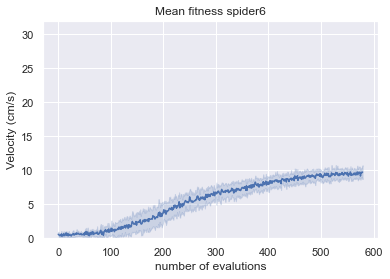

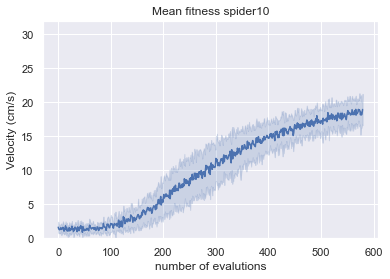

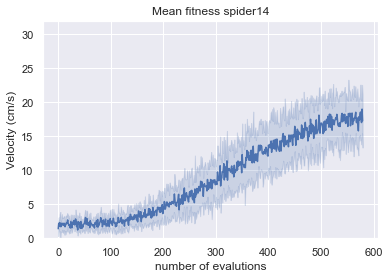

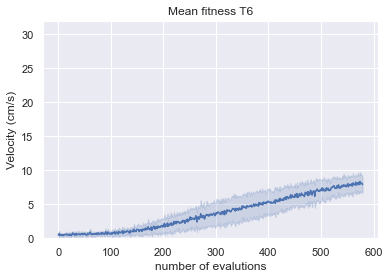

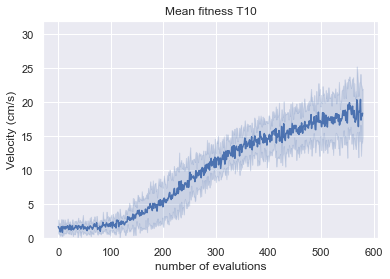

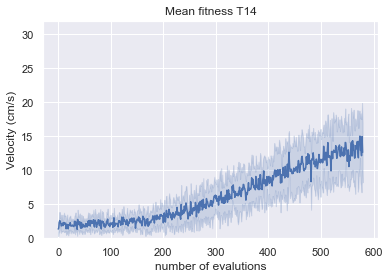

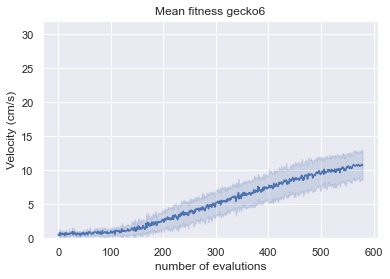

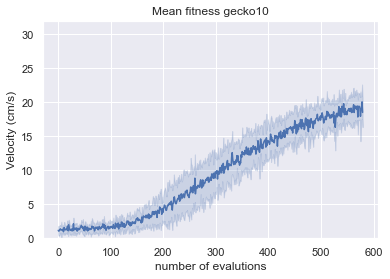

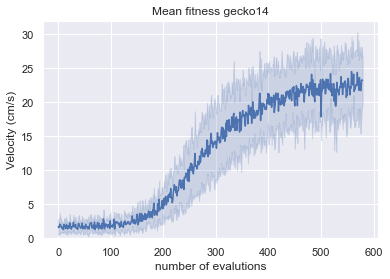

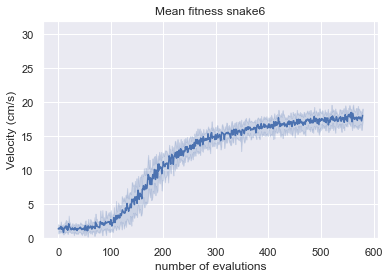

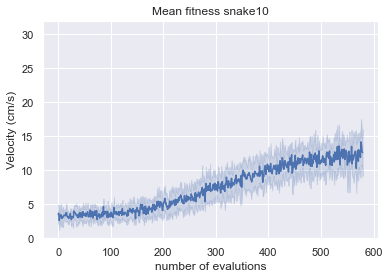

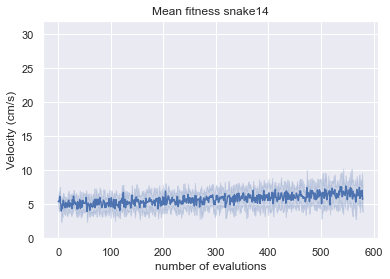

In [1]:
import pandas as pd
import seaborn as sns
import copy
import matplotlib.pyplot as plt

def plot_mean_fitness(morphologie):
    for experiment in range(1, 11): # loop over experiments
        df = pd.read_csv(f'data_gait/PPO/{morphologie}/database{experiment}/fitnesses.csv')
        df["experiment"] = experiment
        if experiment == 1:
            df_total = df.copy(deep=True)
        else: 
            df_total = pd.concat([df_total, df])  # concat dataframes
    df2= copy.deepcopy(df_total)
    df2['fitness'] = df2['fitness']*100/30  # transform fitness to cm/s
    sns.set_theme(style="darkgrid")
    
    # Plot the responses for different events and regions
    ax = sns.lineplot(data=df2, x="individual_id", y="fitness", ci="sd")
    ax.set(xlabel='number of evalutions',
       ylabel='Velocity (cm/s)',
       title= (f'Mean fitness {morphologie}'))
    ax.set(ylim=(0, 32))
    fig = ax.get_figure()
    fig.savefig(f"mean_fitness_{morphologie}.png")
    return plt.show()

morphologies = ['spider6', 'spider10' , 'spider14', 'T6', 'T10', 'T14', 'gecko6', 'gecko10', 'gecko14', 'snake6', 'snake10', 'snake14']
for morphologie in morphologies:
    plot_mean_fitness(morphologie)
    

[Text(0.5, 1.0, 'Mean best fitness gait learning(cm/s)')]

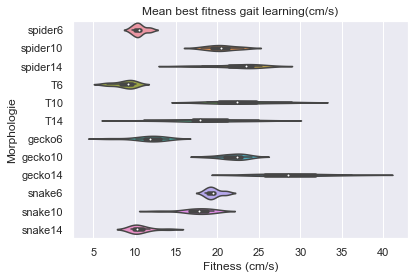

In [2]:
import numpy as np
def mean_variance_best_fitness():  # store best fitnesses in table
    morphologies = ['spider6', 'spider10' , 'spider14', 'T6', 'T10', 'T14', 'gecko6', 'gecko10', 'gecko14', 'snake6', 'snake10', 'snake14']    
    for morphologie in morphologies:
        
        for experiment in range(1, 11): 
            dfp = pd.read_csv(f'data_gait/PPO/{morphologie}/database{experiment}/fitnesses.csv')
            
            dfp = dfp[dfp['fitness'] == dfp['fitness'].max()] # find maximum fitness
            dfp["Experiment"] = experiment
            dfp["Morphologie"] = morphologie
            if experiment ==1 and morphologie =='spider6':
                df = dfp
            else:
                df = pd.concat([df, dfp]) # concat
    df['fitness'] = df['fitness']*100/30  # transform fitness to cm/s
    return df 

# plot mean best fitness for each
df_mbf = mean_variance_best_fitness()
df_mbf.rename(columns={"fitness": "Fitness"}, inplace=True)
g = sns.violinplot(
    data=df_mbf, kind="bar",
    x="Fitness", y="Morphologie", alpha=.6, height=6
)
g.set_ylabel("Morphologie")
g.set_xlabel("Fitness (cm/s)")
sns.set(rc={'figure.figsize':(10.7,9.27)})
g.set(title='Mean best fitness gait learning(cm/s)') 

[Text(0.5, 1.0, 'Mean best fitness gait learning(cm/s)')]

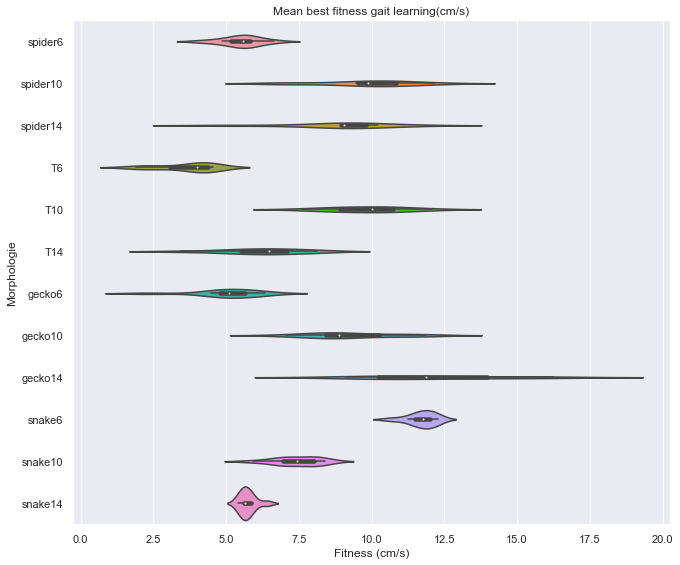

In [3]:
import numpy as np
def mean_variance_efficiency():  # store mean fitnesses in table
    morphologies = ['spider6', 'spider10' , 'spider14', 'T6', 'T10', 'T14', 'gecko6', 'gecko10', 'gecko14', 'snake6', 'snake10', 'snake14']    
    for morphologie in morphologies:
        
        for experiment in range(1, 11): 
            dfp = pd.read_csv(f'data_gait/PPO/{morphologie}/database{experiment}/fitnesses.csv')
            dfp['fitness'] = dfp['fitness'].mean() # find mean fitness
            dfp = dfp.iloc[0:1]
            dfp["Experiment"] = experiment
            dfp["Morphologie"] = morphologie
            if experiment ==1 and morphologie =='spider6':
                df = dfp
            else:
                df = pd.concat([df, dfp]) # concat
    df['fitness'] = df['fitness']*100/30  # transform fitness to cm/s
    return df 

# plot mean average fitness (area under fitness curve devided by runs = mean fitness), a measure for efficiency
df_eff = mean_variance_efficiency()

df_eff.rename(columns={"fitness": "Fitness"}, inplace=True)
g = sns.violinplot(
    data=df_eff, kind="bar",
    x="Fitness", y="Morphologie", alpha=.6, height=6
)
g.set_ylabel("Morphologie")
g.set_xlabel("Fitness (cm/s)")
sns.set(rc={'figure.figsize':(10.7,9.27)})
g.set(title='Mean best fitness gait learning(cm/s)') 


In [6]:

# add size and shape column
def add_shape_size(df):
    
    df['Size'] = "i" # initiazte size column
    for x in df['Morphologie']:
        if str("6") in str(x):
            df.loc[df['Morphologie'] == x,["Size"]] = '6'
        elif str("10") in str(x):
            df.loc[df['Morphologie'] == x,["Size"]] = '10'
        elif str("14") in str(x):
            df.loc[df['Morphologie'] == x,["Size"]] = '14'

    df['Shape'] = "i" # initiate shape column
    for x in df['Morphologie']:
        if str("snake") in str(x):
            df.loc[df['Morphologie'] == x,["Shape"]] = "snake"
        elif str("T") in str(x):
            df.loc[df['Morphologie'] == x,["Shape"]] = "T"
        elif str("gecko") in str(x):
            df.loc[df['Morphologie'] == x,["Shape"]] = "gecko"
        elif str("spider") in str(x):
            df.loc[df['Morphologie'] == x,["Shape"]] = "spider"
    return df

df_mbf = add_shape_size(df_mbf)
df_eff = add_shape_size(df_eff)



In [ ]:
# get the aggregated values

In [7]:
df_mbf['Fitness'].aggregate('std')

6.383228744824941

In [13]:
df_mbf['Fitness'].aggregate('mean')

17.84904589554731

In [8]:
df_eff['Fitness'].aggregate('std')

2.9361949234093543

In [14]:
df_eff['Fitness'].aggregate('mean')

7.947993609889222

In [9]:
# Perform a  shapiro Test to check normality on mbf

import pingouin as pg
pg.normality(df_mbf, dv='Fitness', group='Morphologie', method='shapiro').round(3)

,W,pval,normal
spider6,0.878,0.122,True
spider10,0.968,0.876,True
spider14,0.844,0.049,False
T6,0.873,0.108,True
T10,0.920,0.357,True
T14,0.947,0.629,True
gecko6,0.892,0.180,True
gecko10,0.939,0.541,True
gecko14,0.954,0.716,True
snake6,0.864,0.086,True


In [10]:
# Perform a  shapiro Test to check normality on efficiency

import pingouin as pg
pg.normality(df_eff, dv='Fitness', group='Morphologie', method='shapiro').round(3)

,W,pval,normal
spider6,0.976,0.940,True
spider10,0.907,0.259,True
spider14,0.876,0.118,True
T6,0.817,0.023,False
T10,0.989,0.996,True
T14,0.959,0.779,True
gecko6,0.857,0.070,True
gecko10,0.920,0.355,True
gecko14,0.918,0.339,True
snake6,0.926,0.406,True


In [11]:
# Bartlett's test in Python to check equality in variance:
pg.homoscedasticity(df_mbf, dv='Fitness', 
                    group='Morphologie',
                   method='bartlett')

,T,pval,equal_var
bartlett,52.89878,1.872929e-07,False


In [11]:
pg.homoscedasticity(df_eff, dv='Fitness', 
                    group='Morphologie',
                   method='bartlett')

,T,pval,equal_var
bartlett,52.005332,2.720374e-07,False


In [12]:
# --> no normality, equal in variance, kruskal wallis test 
from pingouin import kruskal
kruskal(data=df_mbf, dv='Fitness', between='Morphologie')

,Source,ddof1,H,p-unc
Kruskal,Morphologie,11,100.397521,1.489747e-16


In [13]:
kruskal(data=df_eff, dv='Fitness', between='Morphologie')

,Source,ddof1,H,p-unc
Kruskal,Morphologie,11,99.257686,2.504835e-16


In [ ]:
# --> p < 0.05, thus significant difference between groups

In [10]:
# now check for size groups
pg.homoscedasticity(df_mbf, dv='Fitness', 
                    group='Size',
                   method='bartlett')

,T,pval,equal_var
bartlett,30.920113,1.931003e-07,False


In [14]:
pg.homoscedasticity(df_eff, dv='Fitness', 
                    group='Size',
                   method='bartlett')

,T,pval,equal_var
bartlett,18.121971,0.000116,False


In [11]:
pg.normality(df_mbf, dv='Fitness', group='Size', method='shapiro').round(3)

,W,pval,normal
6,0.858,0.000,False
10,0.970,0.364,True
14,0.944,0.046,False


In [15]:
pg.normality(df_eff, dv='Fitness', group='Size', method='shapiro').round(3)

,W,pval,normal
6,0.826,0.000,False
10,0.967,0.286,True
14,0.917,0.006,False


In [16]:
#kruskal wallis test, because non equality of variance and non normal
kruskal(data=df_mbf, dv='Fitness', between='Size')


,Source,ddof1,H,p-unc
Kruskal,Size,2,39.160207,3.136673e-09


In [17]:
kruskal(data=df_eff, dv='Fitness', between='Size')

,Source,ddof1,H,p-unc
Kruskal,Size,2,19.551942,0.000057


In [ ]:
# --> significant difference between size groups

In [18]:
# now do for the shape groups
pg.normality(df_mbf, dv='Fitness', group='Shape', method='shapiro').round(3)

,W,pval,normal
spider,0.858,0.001,False
T,0.926,0.037,False
gecko,0.957,0.263,True
snake,0.835,0.000,False


In [19]:
pg.normality(df_eff, dv='Fitness', group='Shape', method='shapiro').round(3)

,W,pval,normal
spider,0.933,0.059,True
T,0.961,0.320,True
gecko,0.972,0.582,True
snake,0.830,0.000,False


In [20]:
pg.homoscedasticity(df_mbf, dv='Fitness', 
                    group='Shape',
                   method='bartlett')

,T,pval,equal_var
bartlett,11.897221,0.007744,False


In [21]:
pg.homoscedasticity(df_eff, dv='Fitness', 
                    group='Shape',
                   method='bartlett')

,T,pval,equal_var
bartlett,4.695418,0.195508,True


In [22]:
kruskal(data=df_mbf, dv='Fitness', between='Shape')
# significant difference between shapes

,Source,ddof1,H,p-unc
Kruskal,Shape,3,11.830468,0.007987


In [23]:
kruskal(data=df_eff, dv='Fitness', between='Shape')
# significant difference between shapes

,Source,ddof1,H,p-unc
Kruskal,Shape,3,8.98595,0.029478


In [ ]:
# efficiency: save


In [43]:
# efficacy: save mean and standard dev as csv

df_morphologie = df_mbf.groupby(['Morphologie']).agg(['mean','var'])['Fitness'] # group by morphologie and aggregate
df_size = df_mbf.groupby(['Size']).agg(['mean','var'])['Fitness'] # group by size and aggregate
df_shape = df_mbf.groupby(['Shape']).agg(['mean','var'])['Fitness'] # group by size and aggregate


df_morphologie.to_csv('mbf_morphologie.csv')
df_size.to_csv('mbf_size.csv')
df_shape.to_csv('mbf_shape.csv')

C:\Users\marti\AppData\Local\Temp\ipykernel_16448\422800631.py:3: FutureWarning: ['Size', 'Shape'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_morphologie = df.groupby(['Morphologie']).agg(['mean','var'])['Fitness'] # group by morphologie and aggregate
C:\Users\marti\AppData\Local\Temp\ipykernel_16448\422800631.py:4: FutureWarning: ['Morphologie', 'Shape'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_size = df.groupby(['Size']).agg(['mean','var'])['Fitness'] # group by size and aggregate
C:\Users\marti\AppData\Local\Temp\ipykernel_16448\422800631.py:5: FutureWarning: ['Morphologie', 'Size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_shape = df.groupby(['Shape']).ag

In [26]:
# efficiency: save mean and standard dev as csv

df_morphologie = df_eff.groupby(['Morphologie']).agg(['mean','var'])['Fitness'] # group by morphologie and aggregate
df_size = df_eff.groupby(['Size']).agg(['mean','var'])['Fitness'] # group by size and aggregate
df_shape = df_eff.groupby(['Shape']).agg(['mean','var'])['Fitness'] # group by size and aggregate


df_morphologie.to_csv('eff_morphologie.csv')
df_size.to_csv('eff_size.csv')
df_shape.to_csv('eff_shape.csv')

C:\Users\marti\AppData\Local\Temp\ipykernel_48104\1527774418.py:3: FutureWarning: ['Size', 'Shape'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_morphologie = df_eff.groupby(['Morphologie']).agg(['mean','var'])['Fitness'] # group by morphologie and aggregate
C:\Users\marti\AppData\Local\Temp\ipykernel_48104\1527774418.py:4: FutureWarning: ['Morphologie', 'Shape'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_size = df_eff.groupby(['Size']).agg(['mean','var'])['Fitness'] # group by size and aggregate
C:\Users\marti\AppData\Local\Temp\ipykernel_48104\1527774418.py:5: FutureWarning: ['Morphologie', 'Size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_shape = df_eff.groupb

In [ ]:
####################### POST HOC ANALYSIS

In [ ]:
################## MBF (efficacy)

In [51]:
# geckoshape > Tshape
# check if size 10 is significantly bigger then 14
pg.mwu(df_mbf[df_mbf["Shape"]=='gecko']['Fitness'], df_mbf[df_mbf["Shape"]=='T']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,608.0,greater,0.009942,-0.351111,0.675556


In [30]:
# check if size 10 is significantly bigger then 14
pg.mwu(df_mbf[df_mbf["Size"]=='10']['Fitness'], df_mbf[df_mbf["Size"]=='14']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,802.0,greater,0.494242,-0.0025,0.50125


In [49]:
# check if gecko14 > T10
pg.mwu(df_mbf[df_mbf["Morphologie"]=='gecko14']['Fitness'], df_mbf[df_mbf["Morphologie"]=='T10']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,90.0,greater,0.001414,-0.8,0.9


In [50]:
# check if Snake14 > T6
pg.mwu(df_mbf[df_mbf["Morphologie"]=='snake14']['Fitness'], df_mbf[df_mbf["Morphologie"]=='T6']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,94.0,greater,0.000504,-0.88,0.94


In [ ]:
############# MAF (efficiency)

In [47]:
# check if gecko14 is significantly bigger then snake6
pg.mwu(df_eff[df_eff["Morphologie"]=='gecko14']['Fitness'], df_eff[df_eff["Morphologie"]=='snake6']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,87.0,greater,0.002898,-0.74,0.87


In [48]:
# check if Gecko6 is significantly bigger T6
pg.mwu(df_eff[df_eff["Morphologie"]=='gecko6']['Fitness'], df_eff[df_eff["Morphologie"]=='T6']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,90.0,greater,0.001414,-0.8,0.9


In [31]:
# check if size 10 is significantly bigger then 14
pg.mwu(df_eff[df_eff["Size"]=='10']['Fitness'], df_eff[df_eff["Size"]=='14']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,1009.0,greater,0.022413,-0.26125,0.630625


In [35]:
# check if shape gecko is significantly bigger then snake
pg.mwu(df_eff[df_eff["Shape"]=='gecko']['Fitness'], df_eff[df_eff["Shape"]=='snake']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,478.0,greater,0.342161,-0.062222,0.531111


In [40]:
# check if shape gecko is significantly bigger then spider
pg.mwu(df_eff[df_eff["Shape"]=='gecko']['Fitness'], df_eff[df_eff["Shape"]=='spider']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,493.0,greater,0.264891,-0.095556,0.547778


In [12]:
# check if shape snake is significantly bigger then spider
pg.mwu(df_eff[df_eff["Shape"]=='snake']['Fitness'], df_eff[df_eff["Shape"]=='spider']['Fitness'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,481.0,greater,0.326022,-0.068889,0.534444
